<a href="https://colab.research.google.com/github/IvanSalinas2000/Datos-Masivos/blob/main/Tarea5y6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession.builder.appName("Tarea 1").getOrCreate()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,091 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
G

In [2]:
# Especifica la ruta del archivo
file_path = '/content/PhiUSIIL_Phishing_URL_Dataset.csv'

# Leer el archivo CSV
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [3]:
# Mostrar el esquema del DataFrame
df.printSchema()

root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpersandInURL: integer (nullable

A continuacion se tienen las representaciones de las columnas en nuestro dataset

1. URL: La URL completa.
2. URLLength: La longitud de la URL en número de caracteres.
3. Domain: El dominio de la URL.
4. DomainLength: La longitud del dominio en número de caracteres.
5. IsDomainIP: Indica si el dominio es una dirección IP (1 = sí, 0 = no).
6. TLD: El dominio de nivel superior (Top-Level Domain) de la URL (por ejemplo, .com, .org).
7. URLSimilarityIndex: Un índice que mide la similitud de la URL con URLs conocidas.
8. CharContinuationRate: La tasa de continuación de caracteres en la URL.
9. TLDLegitimateProb: La probabilidad de que el TLD sea legítimo.
10. URLCharProb: La probabilidad de caracteres específicos en la URL.
11. TLDLength: La longitud del TLD en número de caracteres.
12. NoOfSubDomain: El número de subdominios en la URL.
13. HasObfuscation: Indica si la URL tiene ofuscación (1 = sí, 0 = no).
14. NoOfObfuscatedChar: El número de caracteres ofuscados en la URL.
15. ObfuscationRatio: La proporción de caracteres ofuscados en la URL.
16. NoOfLettersInURL: El número de letras en la URL.
17. LetterRatioInURL: La proporción de letras en la URL.
18. NoOfDegitsInURL: El número de dígitos en la URL.
19. DegitRatioInURL: La proporción de dígitos en la URL.
20. NoOfEqualsInURL: El número de signos de igualdad (=) en la URL.
21. NoOfQMarkInURL: El número de signos de interrogación (?) en la URL.
22. NoOfAmpersandInURL: El número de signos de ampersand (&) en la URL.
23. NoOfOtherSpecialCharsInURL: El número de otros caracteres especiales en la URL.
24. SpacialCharRatioInURL: La proporción de caracteres especiales en la URL.
25. IsHTTPS: Indica si la URL usa HTTPS (1 = sí, 0 = no).
26. LineOfCode: Número de líneas de código en la página web correspondiente a la URL.
27. LargestLineLength: La longitud de la línea más larga de código.
28. HasTitle: Indica si la página web tiene un título (1 = sí, 0 = no).
29. Title: El título de la página web.
30. DomainTitleMatchScore: Puntaje que mide la coincidencia entre el dominio y el título de la página.
31. URLTitleMatchScore: Puntaje que mide la coincidencia entre la URL y el título de la página.
32. HasFavicon: Indica si la página web tiene un favicon (1 = sí, 0 = no).
33. Robots: Indica si hay un archivo robots.txt (1 = sí, 0 = no).
34. IsResponsive: Indica si la página web es responsiva (1 = sí, 0 = no).
35. NoOfURLRedirect: El número de redirecciones URL.
36. NoOfSelfRedirect: El número de redirecciones internas.
37. HasDescription: Indica si la página web tiene una meta descripción (1 = sí, 0 = no).
38. NoOfPopup: El número de ventanas emergentes.
39. NoOfiFrame: El número de elementos iFrame.
40. HasExternalFormSubmit: Indica si la página web tiene un formulario que envía datos externamente (1 = sí, 0 = no).
41. HasSocialNet: Indica si la página web tiene enlaces a redes sociales (1 = sí, 0 = no).
42. HasSubmitButton: Indica si la página web tiene un botón de envío (1 = sí, 0 = no).
43. HasHiddenFields: Indica si la página web tiene campos ocultos (1 = sí, 0 = no).
44. HasPasswordField: Indica si la página web tiene un campo de contraseña (1 = sí, 0 = no).
45. Bank: Indica si la URL está relacionada con banca (1 = sí, 0 = no).
46. Pay: Indica si la URL está relacionada con pagos (1 = sí, 0 = no).
47. Crypto: Indica si la URL está relacionada con criptomonedas (1 = sí, 0 = no).
48. HasCopyrightInfo: Indica si la página web tiene información de derechos de autor (1 = sí, 0 = no).
49. NoOfImage: El número de imágenes en la página web.
50. NoOfCSS: El número de hojas de estilo CSS en la página web.
51. NoOfJS: El número de archivos JavaScript en la página web.
52. NoOfSelfRef: El número de referencias internas.
53. NoOfEmptyRef: El número de referencias vacías.
54. NoOfExternalRef: El número de referencias externas.
55. label: La etiqueta de la URL (1 = phishing, 0 = legítima).

In [4]:
# Convertir DataFrame a RDD
rdd = df.rdd

In [5]:
# Contar el número de filas en el RDD
num_filas = rdd.count()
print(f"Número de filas: {num_filas}")

Número de filas: 235795


In [6]:
# Contar valores distintos en la columna 'label' (legítimo vs phishing)
df.groupBy('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    1|134850|
|    0|100945|
+-----+------+



In [16]:
# Mostrar valores únicos de la columna 'tld'
# Contar los valores únicos de la columna 'tld'
df.groupBy("tld").count().show()
# Contar el número total de categorías únicas en la columna 'tld'
num_categorias = df.select("tld").distinct().count()
print(f"El número total de categorías únicas es: {num_categorias}")

+-------+-----+
|    tld|count|
+-------+-----+
| travel|   46|
| online|  297|
|    art|   53|
|    125|    1|
|   kiwi|    1|
|  watch|    3|
|  citic|    1|
|   farm|    2|
|     51|    2|
|academy|   23|
|     ss|    1|
| taipei|    1|
|     cc|  366|
|  quest|    8|
|  tokyo|   17|
|     cr|   32|
|     mz|   16|
|  space|   71|
|    232|    4|
|    234|    2|
+-------+-----+
only showing top 20 rows

El número total de categorías únicas es: 695


In [20]:
from pyspark.ml.feature import StringIndexer
# Crear un StringIndexer para la columna 'TLD'
indexer = StringIndexer(inputCol="TLD", outputCol="tld_indexed")
df_indexed = indexer.fit(df).transform(df)

# Mostrar los resultados
df_indexed.select("TLD", "tld_indexed").show()

+---+-----------+
|TLD|tld_indexed|
+---+-----------+
|com|        0.0|
| de|        7.0|
| uk|        4.0|
|com|        0.0|
|org|        1.0|
|org|        1.0|
|com|        0.0|
|com|        0.0|
| in|       23.0|
|org|        1.0|
|com|        0.0|
|com|        0.0|
|org|        1.0|
|com|        0.0|
|com|        0.0|
|com|        0.0|
| ie|       48.0|
| hu|       69.0|
|com|        0.0|
| in|       23.0|
+---+-----------+
only showing top 20 rows



In [28]:
# Seleccionar las columnas numéricas (incluyendo 'tld_indexed' creada)
variables_from_url = [
    "URLLength", "DomainLength", "IsDomainIP", "tld_indexed", "CharContinuationRate",
    "TLDLength", "NoOfSubDomain", "HasObfuscation", "NoOfObfuscatedChar", "ObfuscationRatio",
    "NoOfLettersInURL", "LetterRatioInURL", "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
    "NoOfQMarkInURL", "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL", "SpacialCharRatioInURL", "IsHTTPS"
]

# Comparar con las columnas originales y encontrar las eliminadas
all_columns = df.columns
removed_columns = list(set(all_columns) - set(variables_from_url))
print(f"Columnas eliminadas (no numéricas): {removed_columns}")

# Obtener estadísticas descriptivas
df_indexed.select(variables_from_url).describe().show()

Columnas eliminadas (no numéricas): ['HasDescription', 'HasHiddenFields', 'URLSimilarityIndex', 'LargestLineLength', 'NoOfSelfRedirect', 'TLD', 'HasSocialNet', 'Domain', 'NoOfJS', 'Crypto', 'NoOfPopup', 'NoOfiFrame', 'IsResponsive', 'Robots', 'DomainTitleMatchScore', 'NoOfExternalRef', 'Bank', 'label', 'NoOfURLRedirect', 'Title', 'Pay', 'URLTitleMatchScore', 'HasExternalFormSubmit', 'HasCopyrightInfo', 'HasPasswordField', 'NoOfSelfRef', 'NoOfCSS', 'HasTitle', 'HasFavicon', 'URLCharProb', 'TLDLegitimateProb', 'NoOfEmptyRef', 'LineOfCode', 'URL', 'NoOfImage', 'HasSubmitButton']
+-------+-----------------+------------------+--------------------+------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+--------------------------+---------------------+------------------+
|

In [26]:
# Imprimir la cantidad de columnas en variables_from_url
print(f"Cantidad de columnas en variables_from_url: {len(variables_from_url)}")

Cantidad de columnas en variables_from_url: 21


In [29]:
# Agregar 'label' como columna numérica de referencia en el DataFrame
variables_with_label = variables_from_url + ["label"]

# Calcular la correlación entre 'label' y cada columna en variables_from_url
for col in variables_from_url:
    correlation = df_indexed.stat.corr('label', col)
    print(f"Correlation between label and {col}: {correlation}")


Correlation between label and URLLength: -0.23344507450505805
Correlation between label and DomainLength: -0.2831518897970989
Correlation between label and IsDomainIP: -0.06020248983438812
Correlation between label and tld_indexed: -0.06847609470267971
Correlation between label and CharContinuationRate: 0.4677352998341069
Correlation between label and TLDLength: -0.07915862308106306
Correlation between label and NoOfSubDomain: -0.005955129316835737
Correlation between label and HasObfuscation: -0.05247274048202198
Correlation between label and NoOfObfuscatedChar: -0.015314565572224218
Correlation between label and ObfuscationRatio: -0.04191473986003096
Correlation between label and NoOfLettersInURL: -0.2580904986712095
Correlation between label and LetterRatioInURL: -0.3677943369422898
Correlation between label and NoOfDegitsInURL: -0.17798040993402814
Correlation between label and DegitRatioInURL: -0.43203214846937193
Correlation between label and NoOfEqualsInURL: -0.07696317102518734

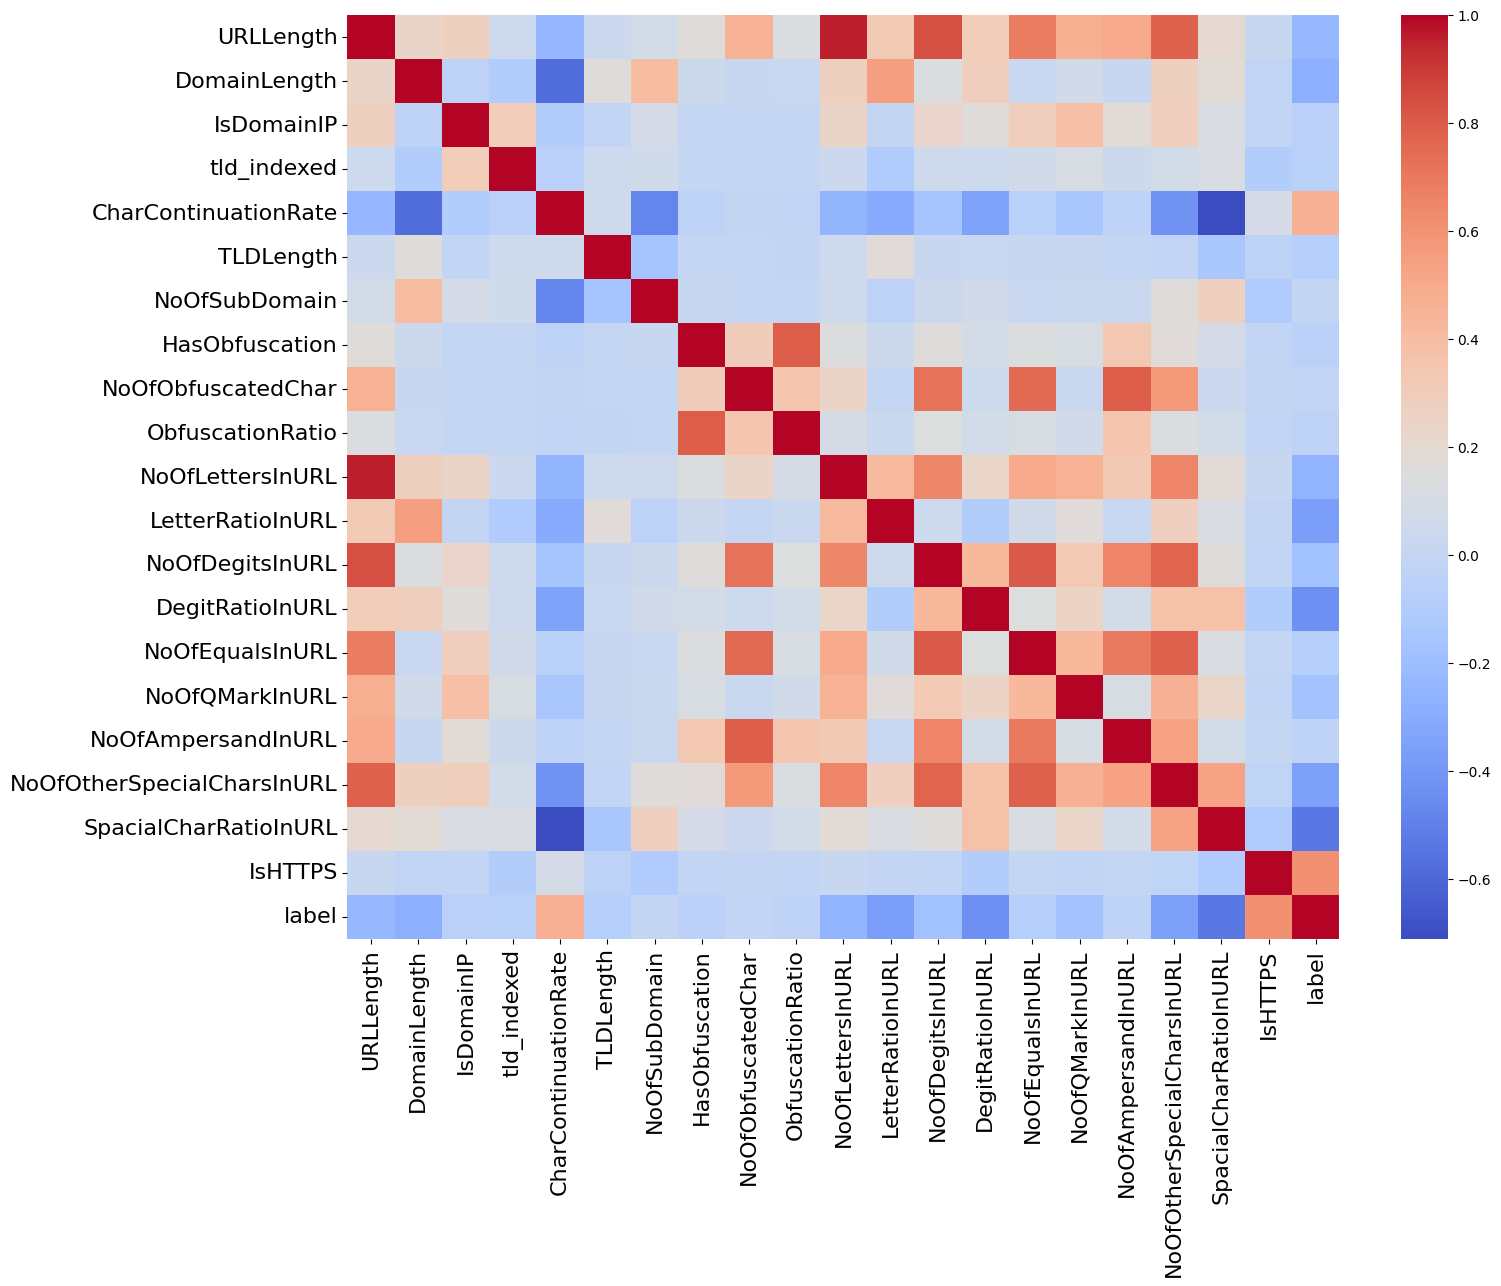

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una matriz de correlación
correlation_matrix = df_indexed.select(variables_from_url + ["label"]).toPandas().corr()

# Crear el mapa de calor usando seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)

# Mostrar el gráfico
plt.xticks(fontsize=16)  # Cambia el tamaño de las etiquetas del eje x
plt.yticks(fontsize=16)  # Cambia el tamaño de las etiquetas del eje y
  # Cambia el tamaño de las etiquetas de la barra de color
plt.show()

In [43]:
#Vector Assambler
from pyspark.ml.feature import StandardScaler, PCA, VectorAssembler
from pyspark.ml.linalg import Vectors
# Primero ensamblamos las columnas numéricas en un solo vector
assembler = VectorAssembler(inputCols=variables_from_url, outputCol="features")
assembled_df = assembler.transform(df_indexed)

#NORMALIZAR DATOS
# Usar StandardScaler para normalizar los datos
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Mostrar los resultados de la normalización
scaled_df.select("scaled_features").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                                            |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(20,[0,1,4,5,6,10,11,17,18,19],[0.7503481976653996,2.622723452788545,4.616114231247277,5.0021787828943856,1.6639784378333413,0.61876232086602,4.711523324991249,0.28347857165162144,0.9878685

In [50]:
# Realizar PCA después de la normalización
# Definir el número de componentes principales deseado
pca = PCA(k=10, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_df)

# Transformar los datos con PCA
pca_result_df = pca_model.transform(scaled_df)

# Mostrar los resultados de PCA
pca_result_df.select("pca_features").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                                                                                                            |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-0.9807282759855744,-0.6056492703014267,0.5476247380146049,-5.3150693120706585,1.9072855192576106,1.8332841312138481,-1.1407322451794095,-2.8423846439576566,0.1859922868266127,-1.1019859235843288]   |
|[-1.1568976887350575,-1.223562873898613,0.04267678798103153,-2.887976033618454,1.0284718574443523,0.6291458258354785,-0.8661658988989824,-2.5390040179033972,-0.8948550655249893,-0.9699157

In [51]:
# Obtener la varianza explicada por cada componente principal
explained_variance = pca_model.explainedVariance
total_variance_explained = sum(explained_variance)

print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {total_variance_explained}")

Varianza explicada por cada componente: [0.29025253266190565,0.13145390645548435,0.09190779756334763,0.082945332415603,0.06848433056910079,0.05517647998482788,0.05159390500399649,0.04521435617549562,0.04067288286086626,0.03455981460278687]
Varianza total explicada: 0.8922613382934146


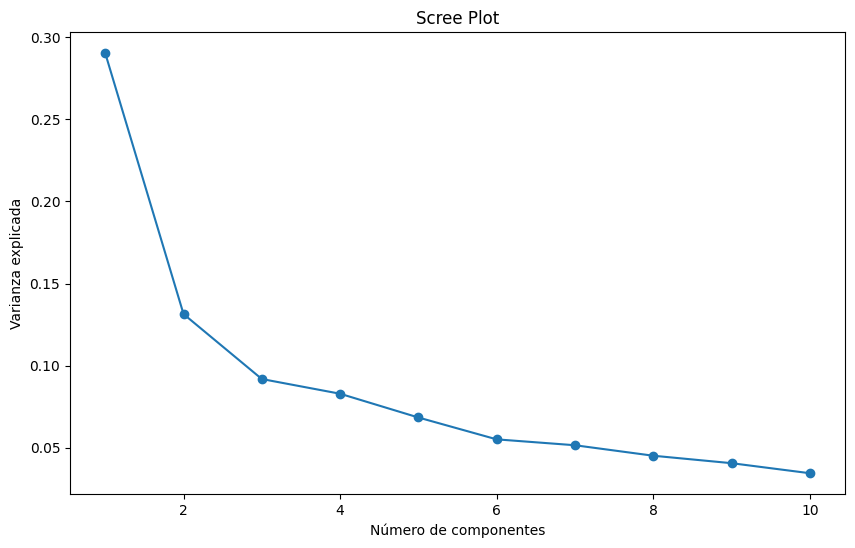

In [52]:
# Graficar el Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_model.explainedVariance) + 1), pca_model.explainedVariance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.title('Scree Plot')
plt.show()

In [54]:
#random forest
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = pca_result_df.randomSplit([0.7, 0.3], seed=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(labelCol="label", featuresCol="pca_features", numTrees=100)

# Entrenar el modelo
rf_model = rf.fit(train_data)

# Realizar predicciones en el conjunto de prueba
predictions = rf_model.transform(test_data)

# Evaluar la precisión del modelo
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Precisión del modelo: {accuracy}")

# Mostrar un informe de clasificación
predictions.select("label", "prediction", "probability").show()


Precisión del modelo: 0.9856785375991405
+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.90203603783784...|
|    0|       0.0|[0.98121335392323...|
|    0|       0.0|[0.99215135471008...|
|    0|       0.0|[0.99215135471008...|
|    0|       0.0|[0.99726195898047...|
|    0|       0.0|[0.87792824470094...|
|    0|       0.0|[0.87792824470094...|
|    0|       0.0|[0.87792824470094...|
|    0|       0.0|[0.97621132400863...|
|    0|       0.0|[0.98817715518522...|
|    0|       0.0|[0.99322722775511...|
|    0|       0.0|[0.98642527793527...|
|    0|       0.0|[0.99522579559978...|
|    0|       0.0|[0.89991297807749...|
|    0|       0.0|[0.91518968126022...|
|    0|       0.0|[0.99228991193303...|
|    0|       0.0|[0.98790705154848...|
|    0|       0.0|[0.92410973401436...|
|    0|       0.0|[0.97589958304586...|
|    0|       0.0|[0.94098645002021...|
+-----+----------+--------------------+

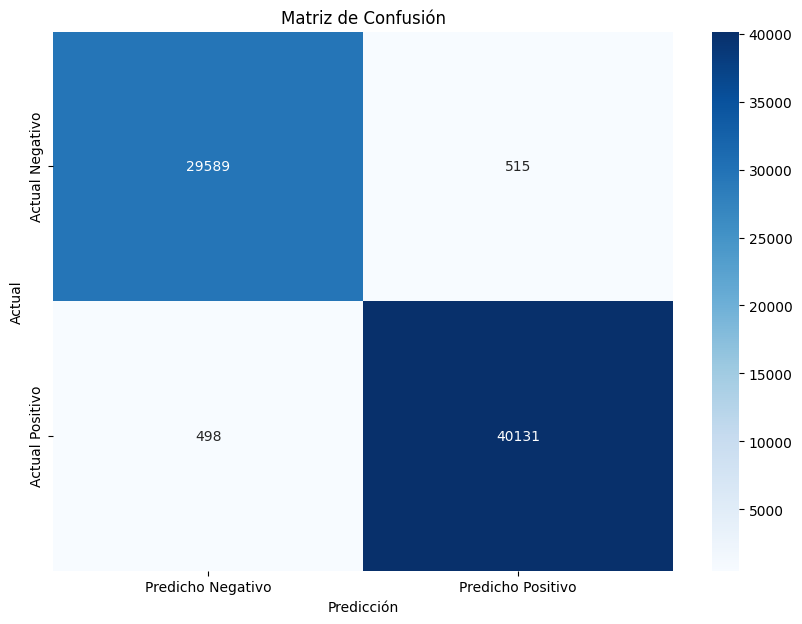

In [56]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las predicciones y etiquetas a un DataFrame de Pandas
predictions_pd = predictions.select("label", "prediction").toPandas()

# Calcular la matriz de confusión
cm = confusion_matrix(predictions_pd["label"], predictions_pd["prediction"])

# Crear un DataFrame de la matriz de confusión para facilitar la visualización
cm_df = pd.DataFrame(cm, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
